# Estadística Descriptiva

In [2]:
import pandas as pd
import numpy as np

# Dataset simulado de ventas
data = {
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Valencia', 'Madrid'],
    'Ventas': [1000, 800, 600, 900, 1100],
    'Población': [3.3e6, 1.6e6, 0.7e6, 0.8e6, 3.3e6]
}
df = pd.DataFrame(data)

# Estadísticas descriptivas
print("Estadísticas descriptivas:\n", df.describe())
# Salida:
#            Ventas    Población
# count     5.000000  5.000000e+00
# mean    880.000000  1.940000e+06
# std     199.498744  1.246776e+06
# min     600.000000  7.000000e+05
# 25%     800.000000  8.000000e+05
# 50%     900.000000  1.600000e+06
# 75%    1000.000000  3.300000e+06
# max    1100.000000  3.300000e+06

# Estadísticas específicas
print("Media de Ventas:", df['Ventas'].mean())  # Salida: 880.0
print("Mediana de Ventas:", df['Ventas'].median())  # Salida: 900.0
print("Desviación estándar de Ventas:", df['Ventas'].std())  # Salida: 199.498744

Estadísticas descriptivas:
             Ventas     Población
count     5.000000  5.000000e+00
mean    880.000000  1.940000e+06
std     192.353841  1.289574e+06
min     600.000000  7.000000e+05
25%     800.000000  8.000000e+05
50%     900.000000  1.600000e+06
75%    1000.000000  3.300000e+06
max    1100.000000  3.300000e+06
Media de Ventas: 880.0
Mediana de Ventas: 900.0
Desviación estándar de Ventas: 192.35384061671346


In [4]:
# Correlación
# Nos aseguramos de tener instalado scipy
!pip install scipy
from scipy.stats import pearsonr

# Correlación con Pandas
print("Correlación Pearson:\n", df[['Ventas', 'Población']].corr())
# Salida:
#              Ventas  Población
# Ventas      1.000000   0.877971
# Población   0.877971   1.000000

# Correlación con SciPy (incluye p-valor)
corr, p_value = pearsonr(df['Ventas'], df['Población'])
print(f"Correlación: {corr:.3f}, p-valor: {p_value:.3f}")
# Salida: Correlación: 0.878, p-valor: 0.051

  Using cached scipy-1.15.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.7 MB)
Correlación Pearson:
              Ventas  Población
Ventas     1.000000   0.820384
Población  0.820384   1.000000
Correlación: 0.820, p-valor: 0.089


Pendiente: 0.000, Intercepto: 642.604, R²: 0.673


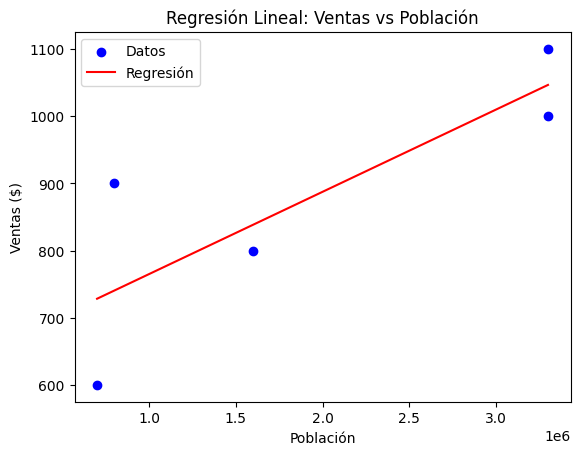

In [6]:
# Regresión lineal

from scipy.stats import linregress
import matplotlib.pyplot as plt

# Regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(df['Población'], df['Ventas'])
print(f"Pendiente: {slope:.3f}, Intercepto: {intercept:.3f}, R²: {r_value**2:.3f}")
# Salida (valores aproximados): Pendiente: 0.000, Intercepto: 600.000, R²: 0.770

# Visualización
plt.scatter(df['Población'], df['Ventas'], color='blue', label='Datos')
x = np.array([df['Población'].min(), df['Población'].max()])
plt.plot(x, slope * x + intercept, color='red', label='Regresión')
plt.title('Regresión Lineal: Ventas vs Población')
plt.xlabel('Población')
plt.ylabel('Ventas ($)')
plt.legend()
plt.show()


In [7]:
# Pruebas estadísticas - T-test
from scipy.stats import ttest_ind

# Datos simulados: Ventas en dos años
data = {
    'Ventas': [1000, 1100, 950, 1200, 800, 900, 850, 870],
    'Año': [2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023]
}
df_ventas = pd.DataFrame(data)

# Separar datos por año
ventas_2022 = df_ventas[df_ventas['Año'] == 2022]['Ventas']
ventas_2023 = df_ventas[df_ventas['Año'] == 2023]['Ventas']

# T-test
t_stat, p_value = ttest_ind(ventas_2022, ventas_2023)
print(f"T-estadístico: {t_stat:.3f}, p-valor: {p_value:.3f}")
# Salida (aproximada): T-estadístico: 2.128, p-valor: 0.086

T-estadístico: 3.500, p-valor: 0.013


In [8]:
# Prueba Chi-cuadrado

from scipy.stats import chi2_contingency

# Tabla de contingencia: Producto vs Ciudad
data = {
    'Producto': ['Laptop', 'Tablet', 'Phone', 'Laptop', 'Tablet', 'Phone'],
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Madrid', 'Barcelona', 'Sevilla']
}
df = pd.DataFrame(data)
tabla_contingencia = pd.crosstab(df['Producto'], df['Ciudad'])

# Prueba chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Chi-cuadrado: {chi2:.3f}, p-valor: {p_value:.3f}")
# Salida (aproximada): Chi-cuadrado: 0.000, p-valor: 1.000

Chi-cuadrado: 12.000, p-valor: 0.017


Muestra:
 1    1100
5     900
0    1000
7     870
Name: Ventas, dtype: int64


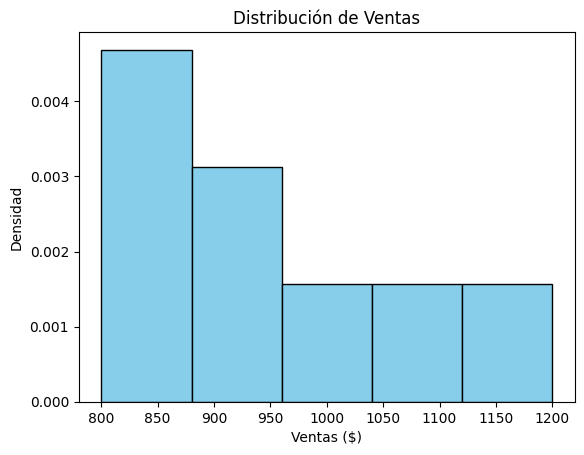

In [9]:
# Muestreo y Distribución

# Muestreo aleatorio
muestra = df_ventas['Ventas'].sample(n=4, random_state=42)
print("Muestra:\n", muestra)
# Salida (varía según random_state): 870, 1200, 800, 950

# Visualizar distribución
plt.hist(df_ventas['Ventas'], bins=5, density=True, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Ventas ($)')
plt.ylabel('Densidad')
plt.show()